# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
gorjetas = sns.load_dataset("tips")
gorjetas.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
gorjetas['tip_pct'] = gorjetas['tip'] / (gorjetas['total_bill'] - gorjetas['tip'])
gorjetas['net_bill'] = gorjetas['total_bill'] - gorjetas['tip']
gorjetas.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [4]:
gorjetas['log_net_bill'] = np.log(gorjetas['net_bill'])
modelo1 = smf.ols('tip_pct ~ log_net_bill', data=gorjetas).fit()
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           1.62e-13
Time:                        12:52:10   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6181      0.054     11.444      0.000       0.512       0.724
log_net_bill    -0.1534      0.020     -7.820      0.000      -0.192      -0.115
==============================================================================
Omnibus:                      440.899   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171509.052
Skew:                           9.850   Prob(JB):                         0.00
Kurtosis:                     131.381   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

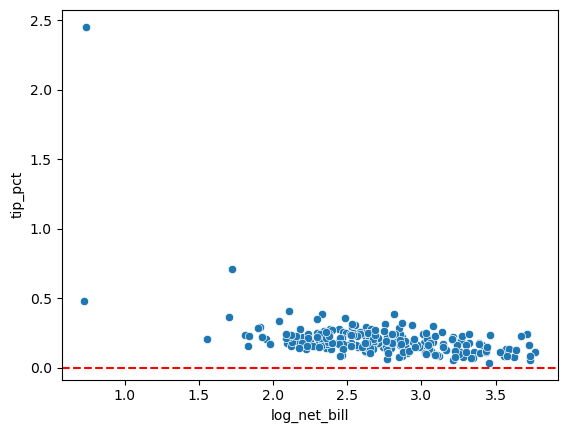

In [5]:
sns.scatterplot(x=gorjetas['log_net_bill'], y=gorjetas['tip_pct'])
plt.axhline(color='r', linestyle='--')

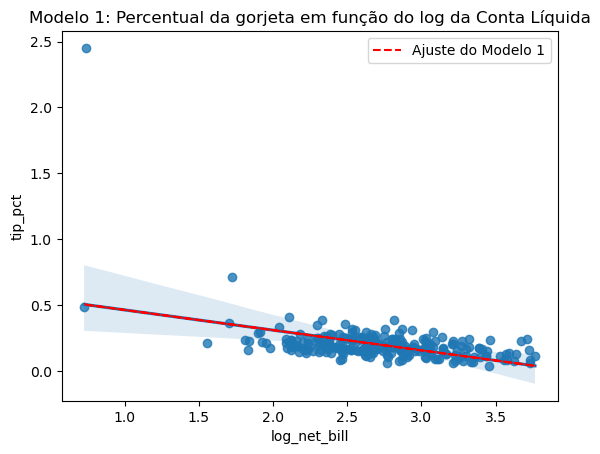

In [6]:
sns.regplot(x = 'log_net_bill', y = 'tip_pct', data = gorjetas)
plt.plot(gorjetas['log_net_bill'], modelo1.fittedvalues, 'r,--', label='Ajuste do Modelo 1')
plt.title('Modelo 1: Percentual da gorjeta em função do log da Conta Líquida')
plt.legend()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [7]:
gorjetas['net_bill_squared'] = gorjetas['net_bill'] ** 2
modelo2 = smf.ols('tip_pct ~ net_bill + net_bill_squared', data=gorjetas).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           1.06e-09
Time:                        12:52:19   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4851      0.047     10.332      0.000       0.393       0.578
net_bill            -0.0268      0.005     -5.477      0.000      -0.036      -0.017
net_bill_squared     0.0005      0.000      4.356      0.000       0.000       0.001
==============================================================================
Omnibus:                      447.620   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186035.672
Skew:                          10.140   Prob(JB):                         0.00
Kurtosis:                     136.744   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

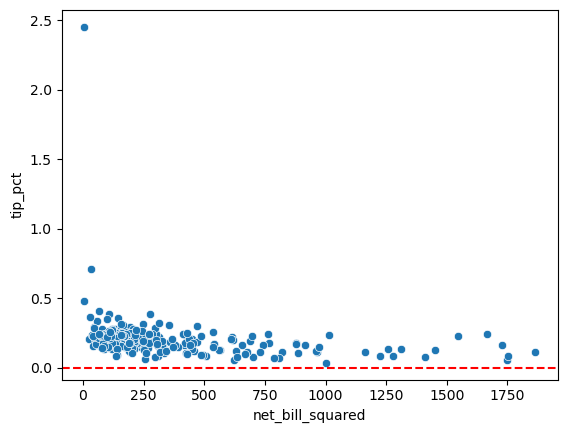

In [8]:
sns.scatterplot(x=gorjetas['net_bill_squared'], y=gorjetas['tip_pct'])
plt.axhline(color='r', linestyle='--')

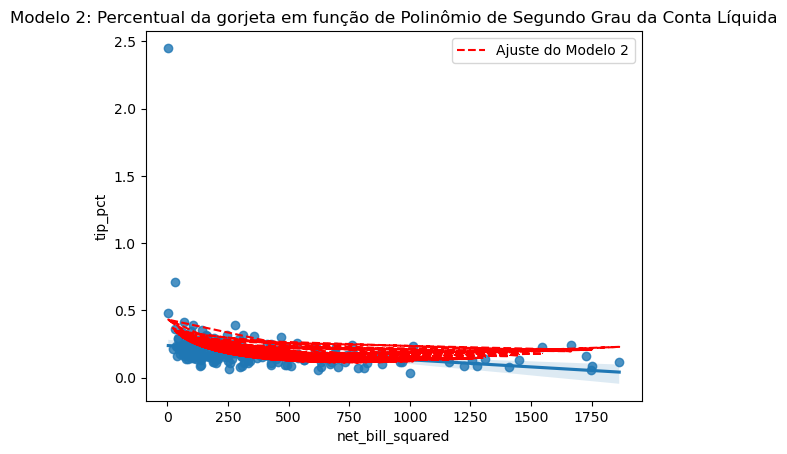

In [9]:
sns.regplot(x = 'net_bill_squared', y = 'tip_pct', data = gorjetas)
plt.plot(gorjetas['net_bill_squared'], modelo2.fittedvalues, 'r,--', label='Ajuste do Modelo 2')
plt.title('Modelo 2: Percentual da gorjeta em função de Polinômio de Segundo Grau da Conta Líquida')
plt.legend()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [10]:
gorjetas['log_tip_pct'] = np.log(gorjetas['tip_pct'])
modelo3 = smf.ols('log_tip_pct ~ net_bill', data=gorjetas).fit()
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_tip_pct   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           8.27e-16
Time:                        12:52:21   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.000      -1.385      -1.165
net_bill      -0.0259      0.003     -8.630      0.000      -0.032      -0.020
==============================================================================
Omnibus:                       49.929   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.392
Skew:                           0.664   Prob(JB):                     7.78e-57
Kurtosis:                       7.864   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

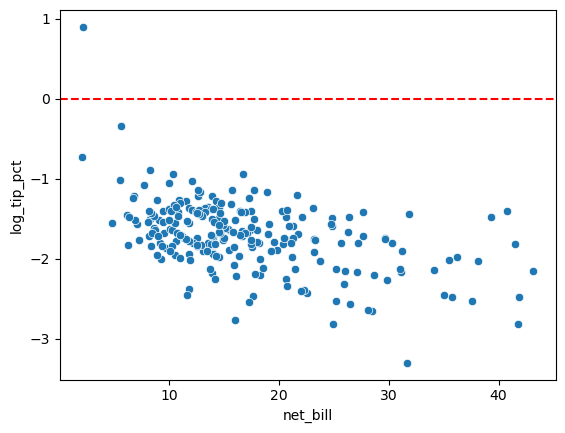

In [11]:
sns.scatterplot(x=gorjetas['net_bill'], y=gorjetas['log_tip_pct'])
plt.axhline(color='r', linestyle='--')

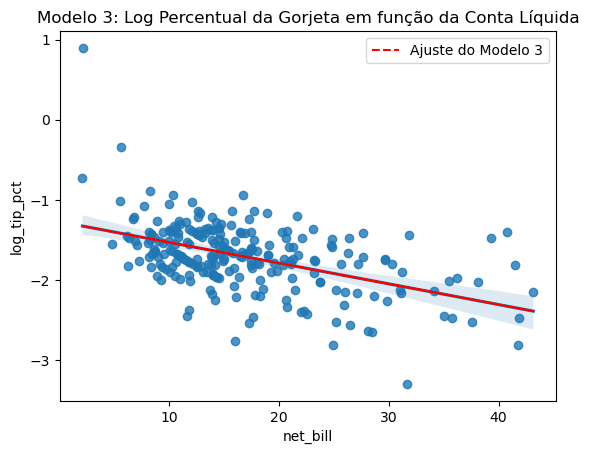

In [12]:
sns.regplot(x = 'net_bill', y = 'log_tip_pct', data = gorjetas)
plt.plot(gorjetas['net_bill'], modelo3.fittedvalues, 'r,--', label='Ajuste do Modelo 3')
plt.title('Modelo 3: Log Percentual da Gorjeta em função da Conta Líquida')
plt.legend()

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [13]:
modelo4 = smf.ols('log_tip_pct ~ log_net_bill', data=gorjetas).fit()
modelo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_tip_pct   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           5.20e-20
Time:                        12:52:24   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3942      0.133     -2.961      0.003      -0.657      -0.132
log_net_bill    -0.4849      0.048    -10.026      0.000      -0.580      -0.390
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

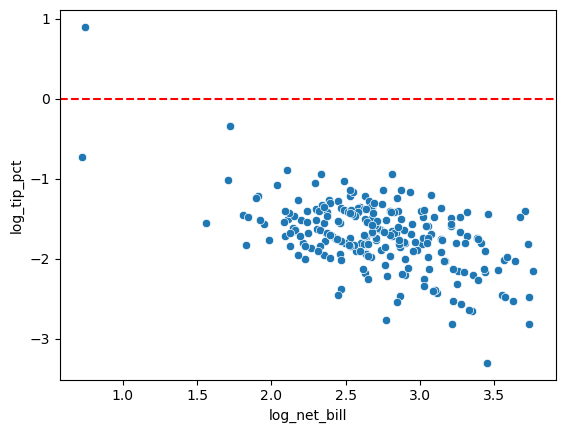

In [14]:
sns.scatterplot(x=gorjetas['log_net_bill'], y=gorjetas['log_tip_pct'])
plt.axhline(color='r', linestyle='--')

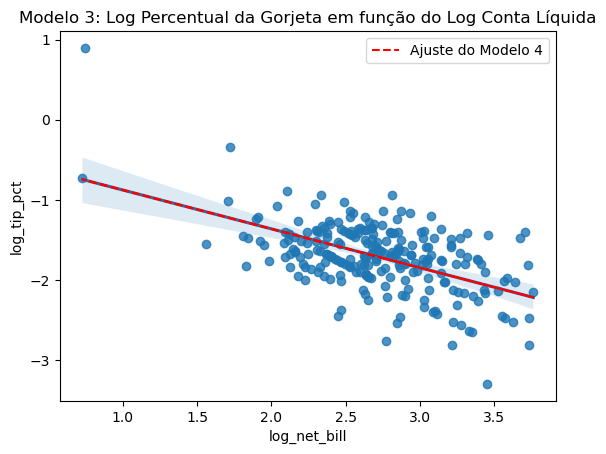

In [15]:
sns.regplot(x = 'log_net_bill', y = 'log_tip_pct', data = gorjetas)
plt.plot(gorjetas['log_net_bill'], modelo4.fittedvalues, 'r,--', label='Ajuste do Modelo 4')
plt.title('Modelo 3: Log Percentual da Gorjeta em função do Log Conta Líquida')
plt.legend()

###  6. qual modelo resultou no melhor ajuste?

In [16]:
r2_modelo1 = modelo1.rsquared
r2_modelo2 = modelo2.rsquared
r2_modelo3 = modelo3.rsquared
r2_modelo4 = modelo4.rsquared

In [17]:
print("R^2 dos modelos:")
print(f"Modelo 1 (tip_pct ~ log(net_bill)): {r2_modelo1:.3f}")
print(f"Modelo 2 (tip_pct ~ net_bill + net_bill^2): {r2_modelo2:.3f}")
print(f"Modelo 3 (log(tip_pct) ~ net_bill): {r2_modelo3:.3f}")
print(f"Modelo 4 (log(tip_pct) ~ log(net_bill)): {r2_modelo4:.3f}")

R^2 dos modelos:
Modelo 1 (tip_pct ~ log(net_bill)): 0.202
Modelo 2 (tip_pct ~ net_bill + net_bill^2): 0.158
Modelo 3 (log(tip_pct) ~ net_bill): 0.235
Modelo 4 (log(tip_pct) ~ log(net_bill)): 0.293


In [18]:
melhor_modelo = max([(r2_modelo1, 'Modelo 1'), (r2_modelo2, 'Modelo 2'), (r2_modelo3, 'Modelo 3'), (r2_modelo4, 'Modelo 4')], key=lambda x: x[0])
print(f"\nO melhor modelo é: {melhor_modelo[1]} com R² = {melhor_modelo[0]:.3f}")


O melhor modelo é: Modelo 4 com R² = 0.293
